In [200]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import gaussian_kde
from scipy.stats import norm
from scipy.stats import gaussian_kde
from scipy.ndimage.filters import gaussian_filter1d

In [274]:
files = [
    'policy1.txt', # ZigZag
    '//policy2.txt', # SmartZigZag
    'policy3.txt', # SmartZigZag with marginal edge condition optimisation
    'policy4.txt', # A*
    'policy5.txt', # A* but knows that walls eventually disappear
    'policy6.txt', # A* (policy 5) with search beginning from food rather than head
    'policy7.txt', # Z*
    'policy8.txt', # Z* (dumbed down)
    'policy9.txt', # Z*+
    'policy10.txt',# Z*++ fully properly
    'policy11.txt', # Z*++ with incentivized wall hugging 
    'policy12.txt', # Z*++ || (control for sanity check)
    'policy13.txt', # Z*++ || + astar understands you can't skip from a start (might help in not so uncommon corner cases)
    'policy14.txt', # Z*++ || + takes forced moves then reevaluates
    'policy15.txt', # LazySpiral
    'policy16.txt', # LazySpiralModed
    'policy17.txt', # LazySpiralModed with 20 margin
    'policy18.txt', # LazySpiralModed with 1 margin
    'policy19.txt' # LazySpiralModed with 1 margin & toggle for endgame
]
for f_id in range(len(files)):
    files[f_id] = '/Users/maximilientirard/Documents/Processing/SnakeAI/' + files[f_id]

In [178]:
seq_of_means = [None] * len(files)
densities = [[] for j in range(898)]
survivals = [None] * len(files)
snake_lengths_at_death_densities = [None] * len(files)

In [177]:
def loadFile(f_id):
    file = files[f_id]
    with open(file) as f:
        content = f.readlines()
    lines = [x.strip() for x in content]
    print(len(lines))

    # deltas
    deltas = [ [] for _ in range(899) ]
    for line in lines:
        times = [int(x.strip()) for x in line.split()]
        times.insert(0, 0)
        for i in range(len(times)-1):
            deltas[i].append(times[i+1]-times[i])

    # survival
    samples = len(lines)
    survival = [0] * 899
    for line in lines:
        duration = len(line.split())
        for i in range(duration):
            survival[i] += 1
    for i in range(len(survival)):
        survival[i] /= samples
    survivals[f_id] = survival
            
    # means        
    means = []
    for i in range(898):
        if len(deltas[i]) <= 1:
            continue
        densities[i].append(gaussian_kde(deltas[i]))
        if len(deltas[i]) > 100 or True:
            means.append(np.mean(deltas[i]))
    seq_of_means[f_id] = means
    
    # snake lengths
    lengths = [len(l.split()) for l in lines]
    lengths_filtered = [l for l in lengths if l < 899]
    len_density = None
    if len(lengths_filtered) > 0:
        len_density = gaussian_kde(lengths_filtered)
    if f_id >= len(snake_lengths_at_death_densities):
        snake_lengths_at_death_densities.append(len_density)
    else:
        snake_lengths_at_death_densities[f_id] = len_density

In [246]:
for f_id in range(len(files)):
    if f_id >= len(seq_of_means):
        seq_of_means.append(None)
        survivals.append(None)
    if seq_of_means[f_id] == None:
        loadFile(f_id)
loadFile(16)

2004
2001


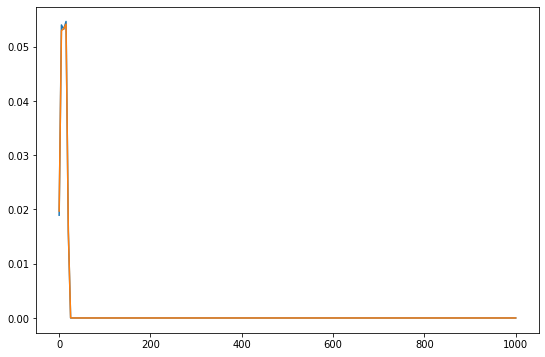

In [16]:
#%matplotlib widget


#fig, ax = plt.subplots()
#plt.subplots_adjust(bottom=0.25)
#fig,(ax0, ax1) = plt.subplots(2, 1)
#axis.margins(x=0)

#slider_ax = plt.axes([0.2, 0.1, 0.7, 0.03])
#food_slider = Slider(slider_ax, '#Food', 0, 898, valstep=1)

#print(np.shape(densities))

#l, = plt.plot(xs, densities[30](xs))
#for density in densities[0]:
#    ax.plot(xs, density(xs))
#l, = ax.plot(xs, densities[30](xs))
#ax.plot(xs, densities[0](xs))
#ax.plot(xs, densities[897](xs))

#def update(val):
#    ax.clf()
#    for density in densities[val]:
#        ax.plot(xs, density(xs))
    #ax.plot(xs, densities[val](xs))
#food_slider.on_changed(update)

#ax0.rcParams["figure.figsize"] = (9,6)
#ax1.rcParams["figure.figsize"] = (9,2)
#plt.show()



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


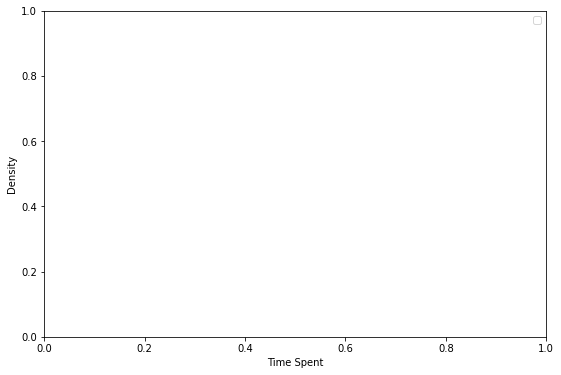

In [281]:
#for i in range(0, 898, 40):
for i in range(0, 400, 50):
    min_val = 0
    #max_val = round((900-i)/1.5)
    max_val = 900
    xs = np.linspace(min_val, max_val,max_val-min_val)
    
    plt.clf()
    plt.rcParams["figure.figsize"] = (9,6)
    for f_id in range(len(files)):
        if f_id != 5 and False:# and f_id != 6 and f_id != 8 and f_id != 10 and f_id != 16 and f_id != 17 and f_id != 18:
            continue
        if f_id < 3 and True:
            continue
        if f_id >= len(densities[i]):
            continue
        if f_id < 14:
            continue
        density = densities[i][f_id]
        plt.plot(xs, density(xs),label = "Policy "+str(f_id))
    plt.xlabel("Time Spent")
    plt.ylabel("Density")
    plt.legend()
    plt.savefig("/Users/maximilientirard/Documents/Processing/SnakeAI/plots/fig"+str(i)+".png")
#plt.show()

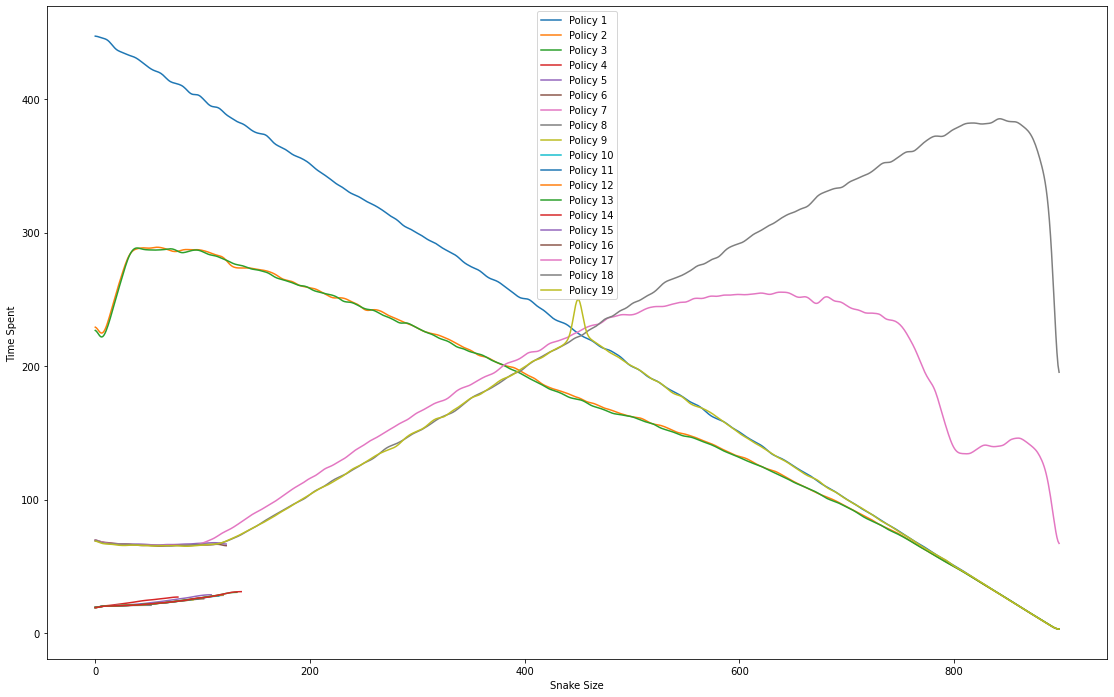

In [247]:

#xs = np.linspace(0, 898, 898)
#i = 1
#for means in seq_of_means:
for i in range(len(seq_of_means)):
    means = seq_of_means[i]
    survival = survivals[i]
    if i < 3 and False:
        continue
    if i != 5 and i != 6 and i != 8 and i != 9 and False:
        continue
    #print(seq_of_means)
    num_valid = len([i for i in survival[1:] if i >= 0.5])
    xs = np.linspace(0, num_valid, num_valid)
    ysmoothed = gaussian_filter1d(means[0:num_valid], sigma=4)
    plt.plot(xs[0:num_valid], ysmoothed, label = "Policy "+str(i+1))
    #plt.plot(xs, means, label = "Policy "+str(i))
    i += 1

"""
def f(x):
    return 3.928*(10**(-13))*(x**6) - 8.778*(10**(-10))*(x**5) + 6.949*(10**(-7))*(x**4) - 0.0004*(x**3) + 0.2143*(x**2) + 13.783*x - 93.453
def g(x):
    return f(x+1)-f(x)
xs = np.linspace(0, 900, 900)
plt.plot(xs, g(xs), label = "Policy Alpha")

def f2(x):
    return (68.0/205.0)*(900-x)/2
plt.plot(xs, f2(xs), label = "test policy")
"""

plt.xlabel("Snake Size")
plt.ylabel("Time Spent")
plt.legend()
plt.rcParams["figure.figsize"] = (16,11)

plt.show()

202628.20876517618
153929.3073792729
153299.66558507402
106420.91716566867


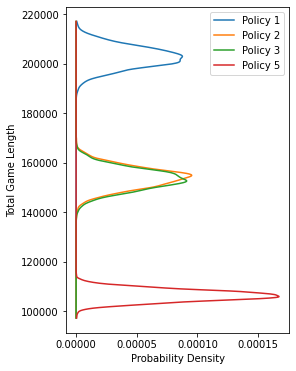

In [249]:
files = [
    '/Users/maximilientirard/Documents/Processing/SnakeAI/policy1.txt',
    '/Users/maximilientirard/Documents/Processing/SnakeAI/policy2.txt',
    '/Users/maximilientirard/Documents/Processing/SnakeAI/policy3.txt',
    '/Users/maximilientirard/Documents/Processing/SnakeAI/policy4.txt',
    '/Users/maximilientirard/Documents/Processing/SnakeAI/policy19.txt'
]
datas = []
min_val = None
max_val = None
for file in files:
    with open(file) as f:
        content = f.readlines()
    data = []
    for x in content:
        split = x.split()
        if len(split) > 898:#898:
            data.append(int(split[-1].strip()))
            #data.append(int(split[20].strip()))
    datas.append(data)
    if len(data) == 0:
        continue
    if min_val is None:
        min_val = min(data)
    else:
        min_val = min(min(data), min_val)
    if max_val is None:
        max_val = max(data)
    else:
        max_val = max(max(data), max_val)
    #print(len(data))
xs = np.linspace(min_val, max_val,1000)
i = 1
for data in datas:
    if len(data) == 0:
        i += 1
        continue
    density = gaussian_kde(data)
    #density.covariance_factor = lambda : 0.25
    #density._compute_covariance()
    plt.plot(density(xs), xs, label = "Policy "+str(i))
    #plt.plot(xs, means, label = "Policy "+str(i))
    i += 1
    print(np.mean(data))
    #plt.plot(xs,norm.pdf(xs, np.mean(data), np.std(data, ddof=1)))
plt.rcParams["figure.figsize"] = (4,6)
plt.xlabel("Probability Density")
plt.ylabel("Total Game Length")
#plt.axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

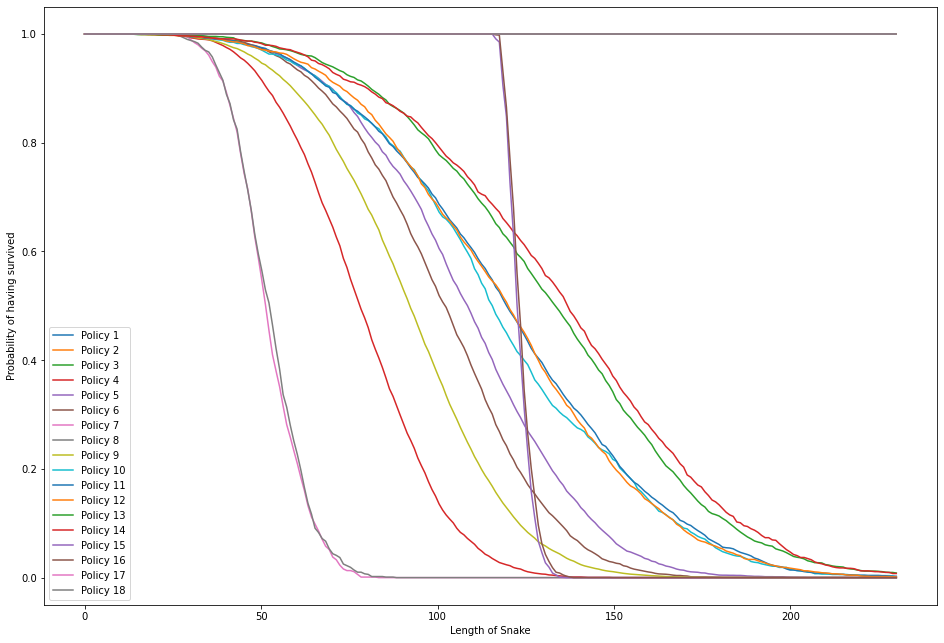

In [243]:
#xs = np.linspace(0, 898,899)
xs = np.linspace(0, 230, 230)
i = 1
for surv in survivals:
    plt.plot(xs, surv[0:len(xs)], label = "Policy "+str(i))
    i += 1
plt.rcParams["figure.figsize"] = (19,12)
#plt.xticks(np.arange(0, 200, 50))
plt.xlabel("Length of Snake")
plt.ylabel("Probability of having survived")
#plt.axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

In [282]:
sum = 0
for s in range(898):
    val = seq_of_means[0][s]
    for i in range(len(seq_of_means)):
        if s >= len(seq_of_means[i]):
            continue
        val = min(val, seq_of_means[i][s])
    sum += val
print(sum)

83332.70754987828


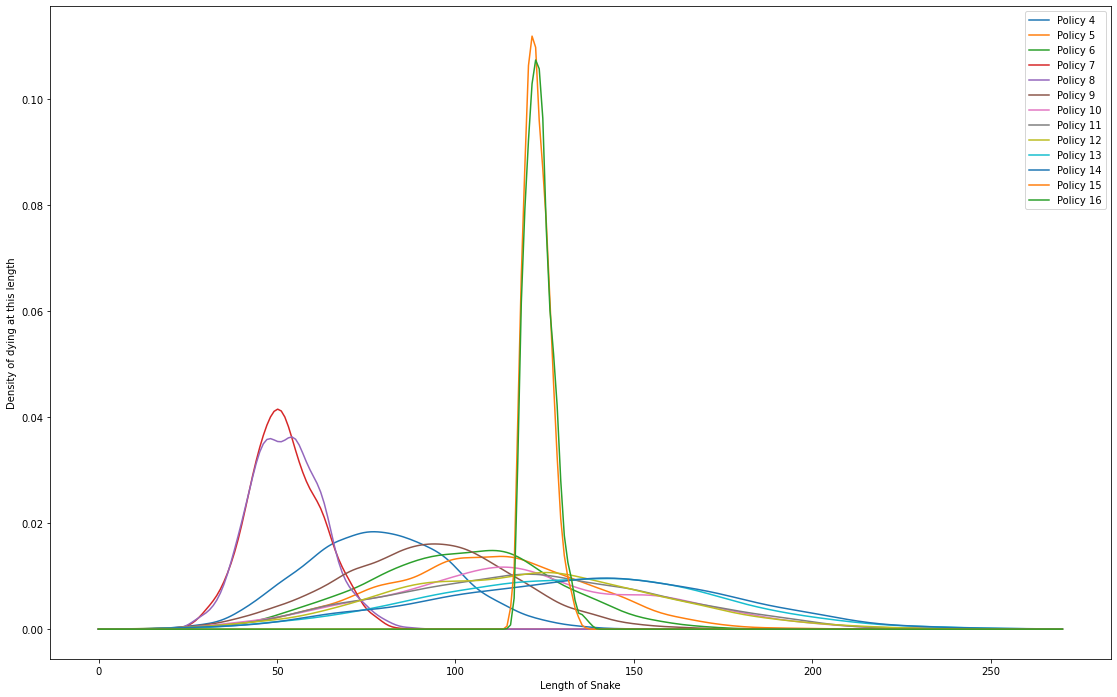

In [244]:
#xs = np.linspace(0, 898,899)
xs = np.linspace(0, 270, 270)
for f_id in range(len(files)):
    density = snake_lengths_at_death_densities[f_id]
    if density == None:
        continue
    plt.plot(xs, density(xs), label = "Policy "+str(f_id+1))
plt.rcParams["figure.figsize"] = (19,12)
#plt.xticks(np.arange(0, 200, 50))
plt.xlabel("Length of Snake")
plt.ylabel("Density of dying at this length")
#plt.axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()